<a href="https://colab.research.google.com/github/DrMohamedElsherif/NeuroHackademy_CT-Brain-Imaging-Classification/blob/main/Classification_Neural_Network_on_CT_Brain_Images_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to the NeuroNest Tutorial on CT Imaging Classification using Artificial Neural Networks!

*Tutorial time*: approximately 70 min

In this notebook, we'll cover several fundamental concepts that are essential for processing and visualizing CT brain images as well as building a neural network.

### Steps in CT Brain Imaging Preprocessing and Classification:

1. **Introduction and Setup**
2. **Importing Required Libraries**
3. **Downloading the Data**
4. **Loading the Dataset**
5. **Exploratory Data Analysis (EDA)**
6. **Data Preprocessing**
7. **Splitting the Dataset**
8. **Building the Neural Network Model**
9. **Training and Evaluating the Model**
10. **Visualizing Model Performance**

### Tutorial Overview:
In this tutorial, we'll walk through each step of building a neural network to classify CT brain images as either normal (labeled 0) or having a hemorrhage (labeled 1). By the end of this tutorial, you should have a solid understanding of how to preprocess the data, build, and evaluate a neural network model using PyTorch.

### Dataset:
For this tutorial, we'll use a dataset from Kaggle. It can be found at:
[ https://www.kaggle.com/datasets/felipekitamura/head-ct-hemorrhage ]

#### Let's get started!

### 1. Introduction and Setup

CT imaging, or Computed Tomography imaging, uses X-rays to create detailed pictures of the inside of the body. It is crucial in medical diagnostics for detecting conditions such as tumors, fractures, and hemorrhages. Read more about CT neuro-imaging.

In this tutorial, our objective is to build a neural network using PyTorch to classify CT brain images as either normal or having a hemorrhage. We will cover the entire process from data preprocessing to model evaluation.


### 2. Importing Required Libraries

To build our neural network, we'll need several Python and PyTorch libraries. These libraries will help with data manipulation, model building, and visualization.


In [ ]:
# Import essential libraries for building a Neural Network uisn Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import shutil
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Additional libraries for data handling and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

### 3. Downloading the Data

We now download our CT Brain Imaging dataset using the Kaggle API. All you need to do is just run this cell to automatically download and extract the dataset.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'head-ct-hemorrhage:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F71215%2F152137%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240807%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240807T171722Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4cfcf43a51e3ca0216a816401c6a9ead19272a4e62a33ee3ae3d4315eb4f6eb1822cba8fc13ac00113bbc390a84a3cda5ce0b6faddb2740af90e5cb916dfc6fe81f546e55803c4f74b75d95db4b64a2e0cc77f6820c062c5ccfca7a8404cd851eb66a7c89fa26a97ebf23b82ce8c1141d9ee2b2f1e48f297d299efd306776e3fb6bb49381126c0f7c5a9c26f26c2020efcea9f05b4a5625d2bcbf1f2c54c542692184d2140118c7e988c0e18734f5a128891c2845aa2814067cb6253c95309bcfcc255dc0add78794f789ff063f7f46b291c48f3161789aea3de080cf09e2f54631cbc58d788711f19cb76dab1b9424d58b31825e7f4becac5ed4ed8e2ff389a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 25608551 bytes downloaded
Downloaded and uncompressed: head-ct-hemorrhage
Data source import complete.


### 4. Loading the Dataset

To begin analyzing our dataset, we need to load the images and their corresponding labels into Python. We can achieve this using libraries like Pandas for handling the labels and PIL (Python Imaging Library) for loading the images.

#### 4.1. Loading the Labels
First, we’ll load the labels from a CSV file and apply necessary corrections.

In [ ]:
# Load the labels
labels = pd.read_csv('/kaggle/input/head-ct-hemorrhage/labels.csv')

# Rename column if necessary (remove extra spaces)
labels.rename(columns={' hemorrhage': 'hemorrhage'}, inplace=True)

# Convert 'id' column to integer, then format as string with .png extension
labels['id'] = labels['id'].astype(int)
labels['id'] = labels['id'].apply(lambda x: str('%03d' % x) + ".png")

The `labels.head()` function outputs the first few rows of the labels DataFrame, which looks like this:


In [ ]:
# Display the first few rows to verify
print(labels.head())

# List unique classes in the 'hemorrhage' column
classes = list(labels['hemorrhage'].unique())
print("Classes:", classes)

        id  hemorrhage
0  000.png           1
1  001.png           1
2  002.png           1
3  003.png           1
4  004.png           1
Classes: [1, 0]



This DataFrame has two columns:
- `id`: A unique identifier for each image.
- `hemorrhage`: The label indicating whether the image shows a hemorrhage (1) or is normal (0).

#### 4.2. Loading and Displaying Sample Images

Next, we'll load some sample images using PIL and display them along with their labels.

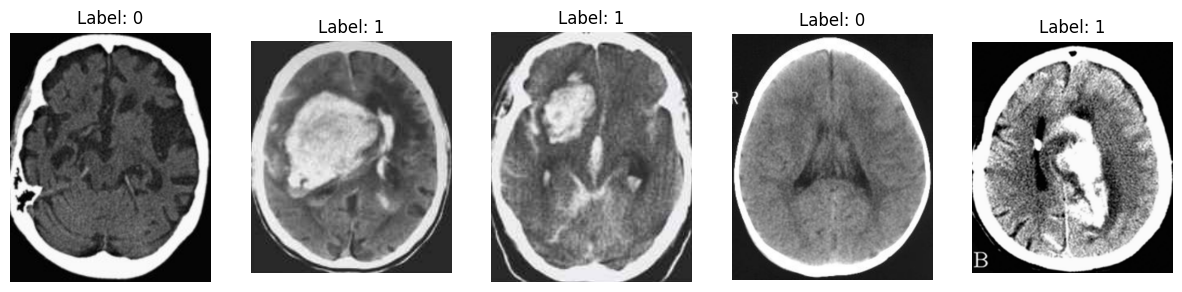

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to display images in a grid
def display_images_grid(image_paths, labels):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    if num_images == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one image

    for ax, image_path, label in zip(axes, image_paths, labels):
        img = Image.open(image_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.show()

# Ensure we include at least one image from each class
class_0_image = labels[labels['hemorrhage'] == 0].sample(1)
class_1_image = labels[labels['hemorrhage'] == 1].sample(1)

# Combine samples from both classes and a few additional random samples
additional_images = labels.sample(3)  # Add more samples for variety
selected_images = pd.concat([class_0_image, class_1_image, additional_images])

# Construct image paths and labels
image_paths = [f'/kaggle/input/head-ct-hemorrhage/head_ct/head_ct/{row["id"]}' for _, row in selected_images.iterrows()]
image_labels = selected_images['hemorrhage'].tolist()

# Display the images side by side
display_images_grid(image_paths, image_labels)

# Did you notice that images dont have the same size? We will get into that shortly

### 5. Exploratory Data Analysis (EDA)

Before performing any kind of experimentation or analysis, it's crucial to understand the dataset. Exploratory Data Analysis (EDA) helps us get insights into the data, detect any anomalies, and understand its structure. In this step, we'll perform basic statistics, visualize the distribution of labels, and display some sample images to gain a better understanding of our dataset.

#### 5.1. Basic Statistics
Let's start by examining some basic statistics of our dataset, such as the number of samples and the distribution of labels.

In [ ]:
# Basic statistics
num_samples = len(labels)
label_distribution = labels['hemorrhage'].value_counts()

print(f'Total number of samples: {num_samples}')
print('Distribution of labels:')
print(label_distribution)

Total number of samples: 200
Distribution of labels:
hemorrhage
1    100
0    100
Name: count, dtype: int64


Here we observe that our dataset is perfectly balanced, with an equal number of images for both classes: hemorrhage and normal. This balance is important for training our neural network, as it ensures that the model has an equal opportunity to learn from both types of images, which can help improve its performance and reduce bias.

#### 5.2. Checking Image Sizes
Since we will be dealing with image data, It's important to verify that all images in our dataset have the same dimensions. Inconsistent image sizes can cause issues when training a model. Let's check the sizes of all images.

The code below checks the width and height of each image and gives us a summary of these sizes. If the images vary too much, we may need to resize them to ensure consistency before training our model.

In [ ]:
# Function to get image sizes
def get_image_sizes(image_folder):
    sizes = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            with Image.open(os.path.join(image_folder, filename)) as img:
                sizes.append(img.size)
    return sizes

# Get image sizes
image_folder = '/kaggle/input/head-ct-hemorrhage/head_ct/head_ct/'
sizes = get_image_sizes(image_folder)
size_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
print(size_df.describe())

            Width      Height
count  200.000000  200.000000
mean   355.505000  433.720000
std    116.785247  142.059481
min    134.000000  135.000000
25%    252.000000  298.750000
50%    345.000000  435.500000
75%    447.250000  554.000000
max    821.000000  957.000000


From the table, we observe the following about our image dimensions:

- **Width:** The width of the images ranges from 134 pixels to 821 pixels, with an average width of approximately 355 pixels.
- **Height:** The height of the images ranges from 135 pixels to 957 pixels, with an average height of about 434 pixels.

This indicates that our images vary significantly in size. Most images are around 345x435 pixels, but there is a wide range in dimensions. To ensure consistency and avoid problems during model training, we should resize all images to a standard size. This will help the neural network process the images more effectively and uniformly.

Before we move forward with resizing, let’s perform one last check to see if there are any corrupt images in our dataset.

#### 5.3 Checking for Corrupt or Empty Images

In [ ]:
def check_image_integrity(image_folder):
    corrupt_images = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            try:
                with Image.open(os.path.join(image_folder, filename)) as img:
                    img.verify()  # Verify image integrity
            except (IOError, SyntaxError) as e:
                corrupt_images.append(filename)
    return corrupt_images

# Check for corrupt images
corrupt_images = check_image_integrity(image_folder)
print(f'Number of corrupt images: {len(corrupt_images)}')
if corrupt_images:
    print('Corrupt images found:', corrupt_images)

Number of corrupt images: 0


Fantastic! We have no corrupt images, let now proceed forward with resizing and other preprocessing steps

### 6. Data Preprocessing

Before feeding our images into a neural network, we need to preprocess them to ensure they are in the right format and size. Preprocessing helps improve model performance and training efficiency. Common preprocessing steps include resizing, normalization, and data augmentation.

#### 6.1. Resize Images

Previously, we observed that the sizes of images in our dataset vary widely. To ensure consistency, we resize all images to a standard size of 224x224 pixels. This size is commonly used in image processing and deep learning.

We alos chose 224x224 size because it offers a good balance between maintaining enough image detail and managing computational resources. Larger images would provide more detail but require more memory and processing power. On the other hand, smaller images would be easier to handle but might lose important details.

By resizing our images to a uniform size, we make it easier for the neural network to process them consistently and effectively.

In [ ]:
# Define the target size
target_size = (224, 224)  # Example size

def resize_images(image_folder, target_size):
    resized_folder = '/kaggle/input/head-ct-hemorrhage/resized_images/'
    os.makedirs(resized_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            img_path = os.path.join(image_folder, filename)
            with Image.open(img_path) as img:
                # Calculate the new size while preserving the aspect ratio
                img.thumbnail(target_size, Image.ANTIALIAS)

                # Create a new image with the target size and paste the resized image
                img_resized = Image.new("RGB", target_size, (255, 255, 255))
                img_resized.paste(img, ((target_size[0] - img.width) // 2, (target_size[1] - img.height) // 2))

                # Save the resized image
                img_resized.save(os.path.join(resized_folder, filename))

# Resize images
resize_images('/kaggle/input/head-ct-hemorrhage/head_ct/head_ct/', target_size)

<ipython-input-9-3ed1ede881ec>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(target_size, Image.ANTIALIAS)


\Now that we resized all images to 224x224 pixels, and saved them into a folder named "resized_images". Let's normalize our images.

#### 6.2. Normalization

You may wonder, **Why do we need to normalize images?**

well, Normalization scales pixel values to a standard range (typically 0 to 1).
it is a crucial preprocessing step in image processing and deep learning. This process has several important benefits:
 1. **Improves Model Training Efficiency:**
   - **Convergence Speed:** Neural networks learn more effectively when inputs are on a similar scale. Normalization helps the network converge faster during training by ensuring that all input features contribute equally to the learning process.
   - **Stable Training:** Scaling inputs to a consistent range helps in stabilizing the training process, reducing the risk of gradients becoming too large or too small.

2. **Enhances Model Performance:**
   - **Consistent Input Values:** Normalized images provide a consistent range of values, which helps the model generalize better and improves overall performance.
   - **Prevents Bias:** Without normalization, the network might learn biases based on the scale of input data, which can negatively impact the performance.

3. **Facilitates Use of Pretrained Models:**
   - **Standard Practice:** Many pretrained models (e.g., VGG16, ResNet) are trained with images normalized to specific mean and standard deviation values. Normalizing your images in the same way allows you to leverage these pretrained models effectively for transfer learning.

So, **Does This Apply to Our Dataset?**

Yes, normalization is particularly relevant for our dataset of CT brain images:

- **Pixel Range Consistency:** The pixel values of our CT images vary widely as we saw in section 5.2. Normalizing ensures that all images are on a similar scale, which is crucial for training a neural network.
- **Improved Training:** By normalizing our images to the same scale, we help the neural network learn more effectively and make the training process more stable.

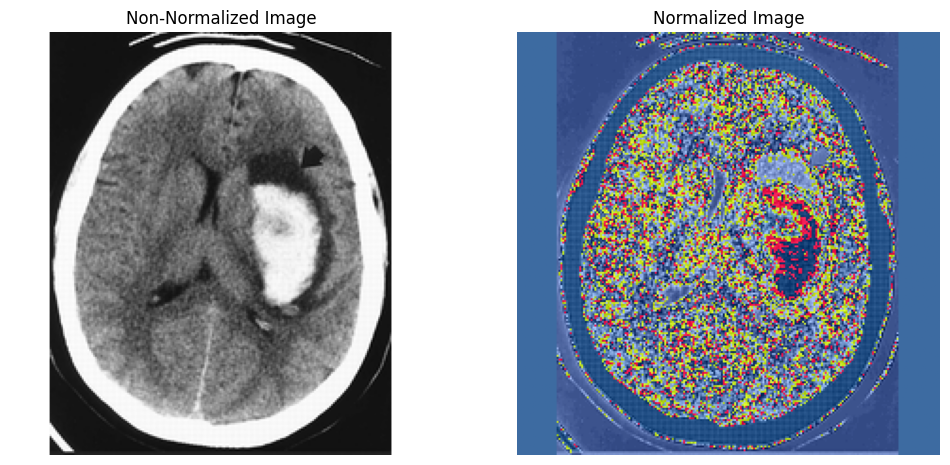

In [ ]:
# Define normalization transform
normalize_transform = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the paths
image_folder = '/kaggle/input/head-ct-hemorrhage/resized_images/'
normalized_folder = '/kaggle/input/head-ct-hemorrhage/normalized_images/'
os.makedirs(normalized_folder, exist_ok=True)

def normalize_images(image_folder, normalized_folder):
    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            img_path = os.path.join(image_folder, filename)
            img = Image.open(img_path)
            img_normalized = normalize_transform(img)

            # Save the normalized image
            img_normalized_pil = transforms.ToPILImage()(img_normalized)
            img_normalized_pil.save(os.path.join(normalized_folder, filename))

# Normalize all images
normalize_images(image_folder, normalized_folder)

# Display a sample normalized image and its non-normalized version side by side
def display_comparison(image_path, normalized_path):
    img = Image.open(image_path)
    img_normalized = Image.open(normalized_path)

    # Convert normalized image to tensor for display
    img_normalized_tensor = transforms.ToTensor()(img_normalized)

    # Plot the images side by side
    plt.figure(figsize=(12, 6))

    # Display non-normalized image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Non-Normalized Image')
    plt.axis('off')

    # Display normalized image
    plt.subplot(1, 2, 2)
    plt.imshow(img_normalized_tensor.permute(1, 2, 0))  # Convert tensor to image for visualization
    plt.title('Normalized Image')
    plt.axis('off')

    plt.show()

# Example paths for a sample image
sample_image_filename = '001.png'
display_comparison(
    os.path.join(image_folder, sample_image_filename),
    os.path.join(normalized_folder, sample_image_filename)
)

Now, one last step remains, which is Data Augmentation.

> Add blockquote



#### 6.3. Image Augmentation

In general, Data augmentation artificially increases the size of the **training** dataset by applying random transformations. Image augmentation involves creating additional random transformations to existing images. This technique helps to artificially increase the size of the training dataset and introduces variety, which is particularly useful when working with smaller datasets. This helps the model generalize better by exposing it to a variety of modified images especially in small dataset like ours and reduces the risk of the model overfitting to the training data.

Image Augmentation techniques include flipping, rotation, and color adjustments, which we will apply to our images in our training set only,  because we need real-world images to test our model and we need to avoid that the neural network creates preferences to flipped or transformed images. So let's split our data first.

### 7. Splitting the Dataset

We split our data into Training, Validation and Test portions.

**Note:**
In our training process, we'll use both types of images:

*   **Non-Augmented Resized-Normalized Images:** These provide the standard data our model needs to learn the core features of our images.
*   **Augmented Resized-Normalized Images:** These are modified versions with random transformations to increase data diversity, helping the model generalize better and avoid overfitting.

#### 7.1. Splitting into Training, Val and Test Sets

 The dataset is strictly class 1 until index 100 and then strictly class 0 afterwards, this indicates that dataset is likely not shuffled and is sorted by class labels in a specific order. This ordering can lead to biased splits if not handled correctly. Therefore we must shuffle the data before splitting.

In [ ]:
# Define paths
normalized_folder = '/kaggle/input/head-ct-hemorrhage/normalized_images/'
train_folder = '/kaggle/input/head-ct-hemorrhage/train_images/'
val_folder = '/kaggle/input/head-ct-hemorrhage/val_images/'
test_folder = '/kaggle/input/head-ct-hemorrhage/test_images/'

# Create directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Shuffle the dataset
shuffled_labels = shuffle(labels, random_state=42)   # The

# Split the dataset
train_df, temp_df = train_test_split(shuffled_labels, test_size=0.2, stratify=shuffled_labels['hemorrhage'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['hemorrhage'])

# Function to copy images to the new folders
def copy_images(df, src_folder, dest_folder):
    for _, row in df.iterrows():
        src_path = os.path.join(src_folder, row['id'])
        dest_path = os.path.join(dest_folder, row['id'])
        shutil.copy(src_path, dest_path)

# Copy images to their respective folders
copy_images(train_df, normalized_folder, train_folder)
copy_images(val_df, normalized_folder, val_folder)
copy_images(test_df, normalized_folder, test_folder)

# Print dataset split details
total_samples = len(labels)
train_samples = len(train_df)
val_samples = len(val_df)
test_samples = len(test_df)

print(f'Total images: {total_samples}')
print(f'Training set: {train_samples} images ({train_samples / total_samples * 100:.2f}%)')
print(f'Validation set: {val_samples} images ({val_samples / total_samples * 100:.2f}%)')
print(f'Test set: {test_samples} images ({test_samples / total_samples * 100:.2f}%)')


Total images: 200
Training set: 160 images (80.00%)
Validation set: 20 images (10.00%)
Test set: 20 images (10.00%)


In [ ]:
# Verify class distribution
print("Class distribution in train set:")
print(train_df['hemorrhage'].value_counts())
print("Class distribution in validation set:")
print(val_df['hemorrhage'].value_counts())
print("Class distribution in test set:")
print(test_df['hemorrhage'].value_counts())

Class distribution in train set:
hemorrhage
0    80
1    80
Name: count, dtype: int64
Class distribution in validation set:
hemorrhage
0    10
1    10
Name: count, dtype: int64
Class distribution in test set:
hemorrhage
1    10
0    10
Name: count, dtype: int64


#### 7.2.  Organizing Images by Class

In [ ]:
def create_class_folders(src_folder, dest_folder, labels):
    """
    Create class subdirectories in the destination folder and copy images.
    """
    classes = labels['hemorrhage'].unique()
    for cls in classes:
        class_folder = os.path.join(dest_folder, str(cls))
        os.makedirs(class_folder, exist_ok=True)

    for _, row in labels.iterrows():
        src_path = os.path.join(src_folder, row['id'])
        dest_path = os.path.join(dest_folder, str(row['hemorrhage']), row['id'])
        shutil.copy(src_path, dest_path)

# Create class folders for training images
create_class_folders('/kaggle/input/head-ct-hemorrhage/normalized_images/', train_folder, train_df)
create_class_folders('/kaggle/input/head-ct-hemorrhage/normalized_images/', val_folder, val_df)
create_class_folders('/kaggle/input/head-ct-hemorrhage/normalized_images/', test_folder, test_df)

#### 7.3. Apply Augmentation to Training and validation sets

In [ ]:
# Define augmentation transformations
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])

# Define the augmented images folder paths
augmented_train_folder = '/kaggle/input/head-ct-hemorrhage/augmented_train_images/'
augmented_val_folder = '/kaggle/input/head-ct-hemorrhage/augmented_val_images/'

# Ensure the augmented folders exist
os.makedirs(augmented_train_folder, exist_ok=True)
os.makedirs(augmented_val_folder, exist_ok=True)

# Function to augment images and save them in class-specific folders
def augment_images(image_folder, augmented_folder, labels):
    for _, row in labels.iterrows():
        img_name = row['id']
        class_label = row['hemorrhage']
        img_path = os.path.join(image_folder, img_name)

        img = Image.open(img_path)
        img_augmented = augmentation_transform(img)

        # Create class-specific folder if it doesn't exist
        class_folder = os.path.join(augmented_folder, str(class_label))
        os.makedirs(class_folder, exist_ok=True)

        # Convert tensor to PIL image and save
        img_augmented_pil = transforms.ToPILImage()(img_augmented)
        img_augmented_pil.save(os.path.join(class_folder, img_name))

# Apply augmentation to the training and validation sets
augment_images(train_folder, augmented_train_folder, train_df)
augment_images(val_folder, augmented_val_folder, val_df)

Now, lets's visualize a sample image and its augmented version

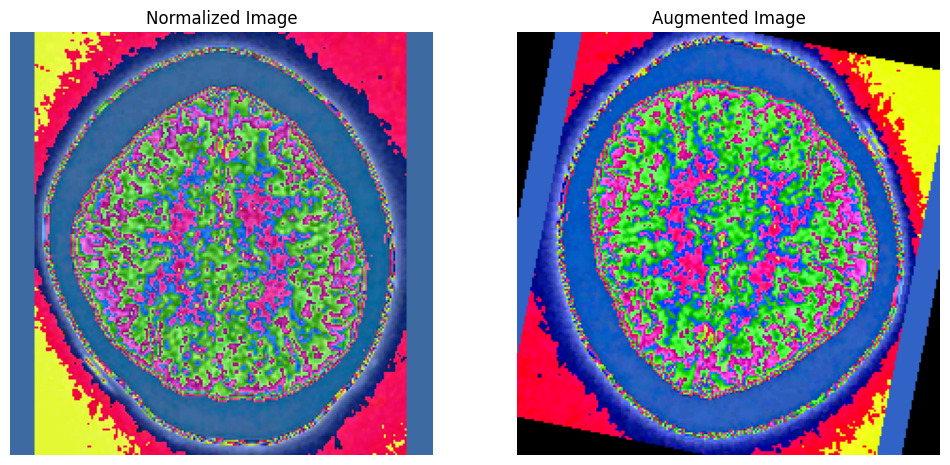

In [ ]:
def display_random_comparison(normalized_folder, augmented_folder, class_label):
    """
    Display a random sample image from the normalized set and its augmented version side by side.

    Args:
        normalized_folder (str): Path to the folder with normalized images.
        augmented_folder (str): Path to the folder with augmented images.
        class_label (int): The class label (subfolder) for the augmented images.
    """
    # Get a list of files in the normalized folder
    image_filenames = [f for f in os.listdir(normalized_folder) if f.endswith('.png')]

    # Filter to include only images that have an augmented version
    valid_filenames = [
        f for f in image_filenames
        if os.path.exists(os.path.join(augmented_folder, str(class_label), f))
    ]

    if not valid_filenames:
        print(f"No images with augmented versions found in class {class_label}.")
        return

    # Choose a random valid image
    sample_image_filename = random.choice(valid_filenames)

    # Define paths to the sample images
    normalized_image_path = os.path.join(normalized_folder, sample_image_filename)
    augmented_image_path = os.path.join(augmented_folder, str(class_label), sample_image_filename)

    # Load the images
    img_normalized = Image.open(normalized_image_path)
    img_augmented = Image.open(augmented_image_path)

    # Convert the augmented image to a tensor for display
    img_augmented_tensor = transforms.ToTensor()(img_augmented)

    # Display the images side by side
    plt.figure(figsize=(12, 6))

    # Display the normalized image
    plt.subplot(1, 2, 1)
    plt.imshow(img_normalized)
    plt.title('Normalized Image')
    plt.axis('off')

    # Display the augmented image
    plt.subplot(1, 2, 2)
    plt.imshow(img_augmented_tensor.permute(1, 2, 0))  # Convert tensor to image for visualization
    plt.title('Augmented Image')
    plt.axis('off')

    plt.show()

# Example usage
display_random_comparison(
    normalized_folder='/kaggle/input/head-ct-hemorrhage/normalized_images/',  # Path to normalized images
    augmented_folder='/kaggle/input/head-ct-hemorrhage/augmented_train_images/',  # Path to augmented images (training set)
    class_label=0  # Adjust based on the class label in the augmented folder
)


Finally we define the Paths to the Image Folders for later feed into the neural network.

In [ ]:
# Define the paths to the datasets
test_folder = '/kaggle/input/head-ct-hemorrhage/test_images/'  # Test data remains the same

# List contents of the directories
print("Augmented Training folder contents:", os.listdir(augmented_train_folder))
print("Augmented Validation folder contents:", os.listdir(augmented_val_folder))
print("Test folder contents:", os.listdir(test_folder))

Augmented Training folder contents: ['1', '0']
Augmented Validation folder contents: ['1', '0']
Test folder contents: ['110.png', '025.png', '152.png', '087.png', '004.png', '084.png', '116.png', '1', '179.png', '088.png', '019.png', '104.png', '074.png', '176.png', '184.png', '100.png', '167.png', '091.png', '0', '164.png', '073.png', '062.png']


In [ ]:
# Confirm strucutre of our folders and data split

def print_folder_structure(folder_path):
    for root, dirs, files in os.walk(folder_path):
        print(f'Root: {root}')
        print(f'Dirs: {dirs}')
        print(f'Files: {files}')

print_folder_structure(augmented_train_folder)
print_folder_structure(augmented_val_folder)

Root: /kaggle/input/head-ct-hemorrhage/augmented_train_images/
Dirs: ['1', '0']
Files: []
Root: /kaggle/input/head-ct-hemorrhage/augmented_train_images/1
Dirs: []
Files: ['010.png', '003.png', '082.png', '066.png', '099.png', '007.png', '075.png', '079.png', '047.png', '064.png', '090.png', '094.png', '046.png', '095.png', '077.png', '042.png', '028.png', '098.png', '032.png', '097.png', '096.png', '018.png', '070.png', '058.png', '052.png', '036.png', '071.png', '054.png', '021.png', '015.png', '055.png', '089.png', '005.png', '057.png', '031.png', '049.png', '026.png', '023.png', '027.png', '061.png', '000.png', '037.png', '035.png', '041.png', '085.png', '012.png', '065.png', '033.png', '039.png', '016.png', '050.png', '044.png', '009.png', '083.png', '051.png', '040.png', '059.png', '017.png', '006.png', '011.png', '022.png', '029.png', '045.png', '093.png', '053.png', '043.png', '034.png', '056.png', '068.png', '024.png', '013.png', '030.png', '078.png', '069.png', '063.png', '092

### 8. Building the Neural Network Model

A CNN typically consists of:

- **Convolutional Layers:** These layers apply convolutions to the input image to extract features.
- **Activation Functions:** Functions like ReLU introduce non-linearity.
- **Pooling Layers:** These layers down-sample the feature maps.
- **Fully Connected Layers:** These layers classify the features extracted by the convolutional layers.

#### 8.1. Model Definition

In [ ]:
from torchsummary import summary

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Fully Connected Layer 1
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  # Ensure this matches the flattened size after convolutions
        # Fully Connected Layer 2
        self.fc2 = nn.Linear(128, 2)  # Output layer for binary classification (e.g., hemorrhage vs. no hemorrhage)

    def forward(self, x):
        # Apply convolutional layers with ReLU activation and max pooling
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        # Flatten the tensor for the fully connected layer
        x = x.view(-1, 64 * 56 * 56)  # Flattening the tensor, ensure input size is consistent with conv output
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device detected: {device}")

# Instantiate your model and move it to the device
model = SimpleCNN().to(device)

# Print the model summary
summary(model, input_size=(3, 224, 224))  # Check that input size is correct


Device detected: cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
            Conv2d-2         [-1, 64, 112, 112]          18,496
            Linear-3                  [-1, 128]      25,690,240
            Linear-4                    [-1, 2]             258
Total params: 25,709,890
Trainable params: 25,709,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 18.38
Params size (MB): 98.08
Estimated Total Size (MB): 117.03
----------------------------------------------------------------


#### 8.2. Loaders
After we have built our CNN architecture, we’ll prepare the dataset by creating data loaders. Data loaders are essential for efficiently loading and processing batches of data during training, validation, and testing. They handle the details of batching, shuffling, and parallel data loading.

In [ ]:
# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.ToTensor()  # Only convert to tensor, as resizing, normalization, and augmentation are already done
])

# Load datasets from the augmented folders
train_dataset = datasets.ImageFolder(root=augmented_train_folder, transform=transform)
val_dataset = datasets.ImageFolder(root=augmented_val_folder, transform=transform)
test_dataset = datasets.ImageFolder(root=test_folder, transform=transform)

# Create DataLoader for batching
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

#### 8.3. Set Up the Training Process

In [ ]:
# Initialize the network
model = SimpleCNN()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

### 9. Train and validate the Model
We now Write the training loop to train the model with the training data.

In [ ]:
# Lists to store loss values for plotting
train_losses = []
val_losses = []
all_preds = []
all_labels = []
all_images = []  # Assuming you have images for visualization

num_epochs = 50

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        # Move data to device
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for this epoch
    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # No need to calculate gradients during validation
        for images, labels in val_loader:
            # Move data to device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # Collect predictions and labels for confusion matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_images.extend(images.cpu().numpy())  # Collect images for visualization

    # Calculate average validation loss and accuracy
    avg_val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    # Append losses for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    # Print epoch results in one line
    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Training Loss: {avg_train_loss:.4f} | '
          f'Training Accuracy: {train_accuracy:.2f}% | '
          f'Validation Loss: {avg_val_loss:.4f} | '
          f'Validation Accuracy: {val_accuracy:.2f}%')

Epoch [1/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9556 | Validation Accuracy: 65.00%
Epoch [2/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9623 | Validation Accuracy: 65.00%
Epoch [3/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9674 | Validation Accuracy: 65.00%
Epoch [4/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9680 | Validation Accuracy: 65.00%
Epoch [5/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9632 | Validation Accuracy: 65.00%
Epoch [6/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9628 | Validation Accuracy: 65.00%
Epoch [7/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9658 | Validation Accuracy: 65.00%
Epoch [8/50] | Training Loss: 0.0001 | Training Accuracy: 100.00% | Validation Loss: 0.9665 | Validation Accuracy: 65.00%
Epoch [9/50] | Training 

### 10. Visualize Model Performance
Now let's see how well or bad our NN model is performing.

#### 10.1. Loss Plot

Plotting the Training and validation loss. Examining this plot will help us detect over- or underfitting.

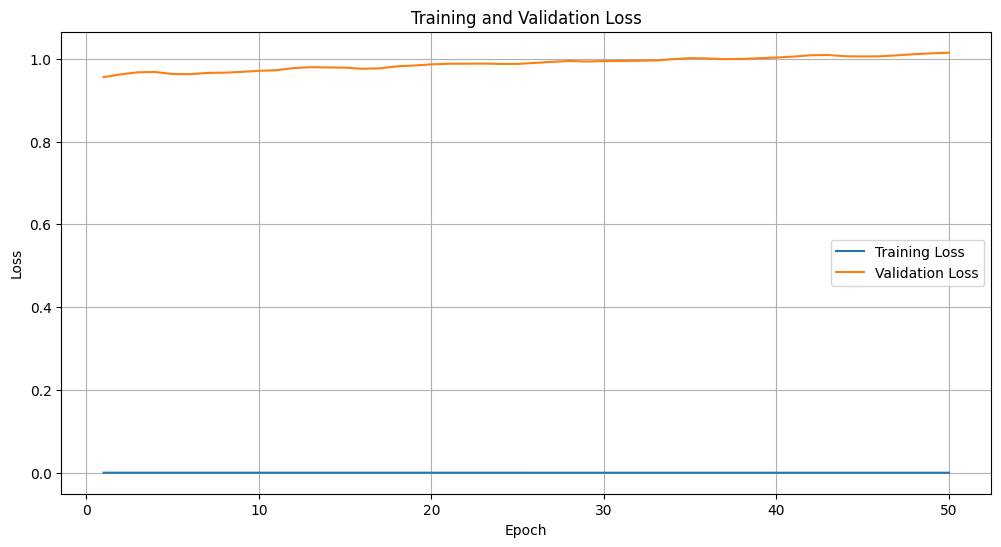

In [ ]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Here we notice that he model is overfitting.

The model's overfitting, indicated by significantly higher validation loss compared to training loss, could stem from several factors: a small or imbalanced dataset that leads to memorization rather than generalization, an overly complex model architecture, inadequate regularization techniques, or insufficient data augmentation. Additionally, training for too many epochs or having noisy training data can exacerbate overfitting.

To address this, we shall consider increasing the dataset size, applying regularization, simplifying the model, using early stopping, and enhancing data augmentation to improve the model's generalization capabilities. These would be subjects of a complementary tutorial.

#### 10.2. Sample Ground Truth Images and their Predicted Classes

Also let's visualize sample CT images and their predicted class as well as the confusion Martix

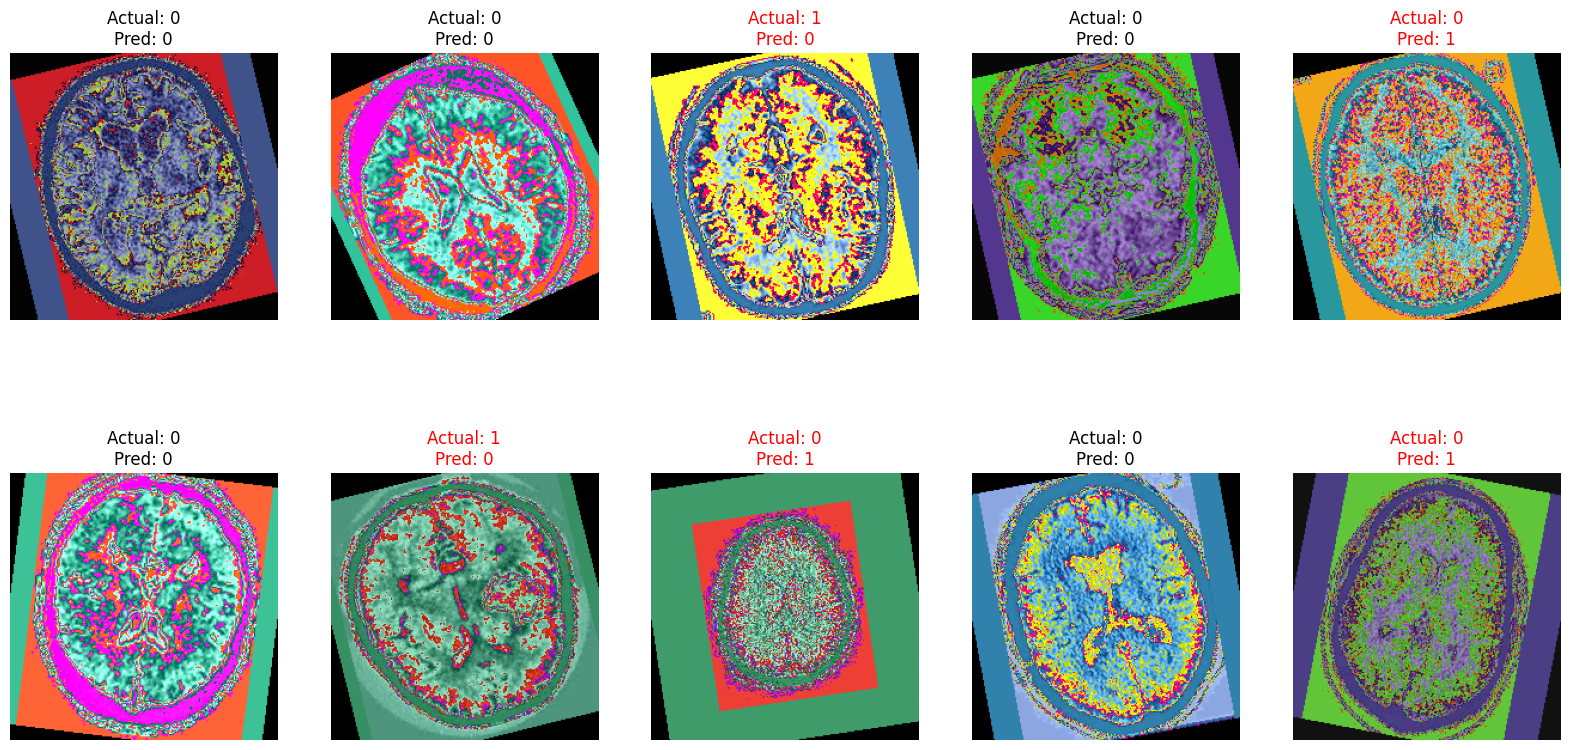

In [ ]:
# Determine the number of correct and incorrect images to display
num_images = 10  # Number of images to display
num_correct_images = num_images // 2
num_incorrect_images = num_images - num_correct_images

# Collecting correct and incorrect images
correct_images = [(img, pred, actual) for img, pred, actual in zip(all_images, all_preds, all_labels) if pred == actual]
incorrect_images = [(img, pred, actual) for img, pred, actual in zip(all_images, all_preds, all_labels) if pred != actual]

# Ensure there are enough images to display
correct_images = correct_images[:num_correct_images]
incorrect_images = incorrect_images[:num_incorrect_images]

# Combine and shuffle images
selected_images = correct_images + incorrect_images
np.random.shuffle(selected_images)

# Plot images
plt.figure(figsize=(20, 10))
for i, (img, pred, actual) in enumerate(selected_images):
    plt.subplot(2, num_images // 2, i + 1)
    img = img.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    plt.imshow(img)
    plt.axis('off')
    title_color = 'red' if pred != actual else 'black'
    plt.title(f"Actual: {actual}\nPred: {pred}", color=title_color)
plt.show()

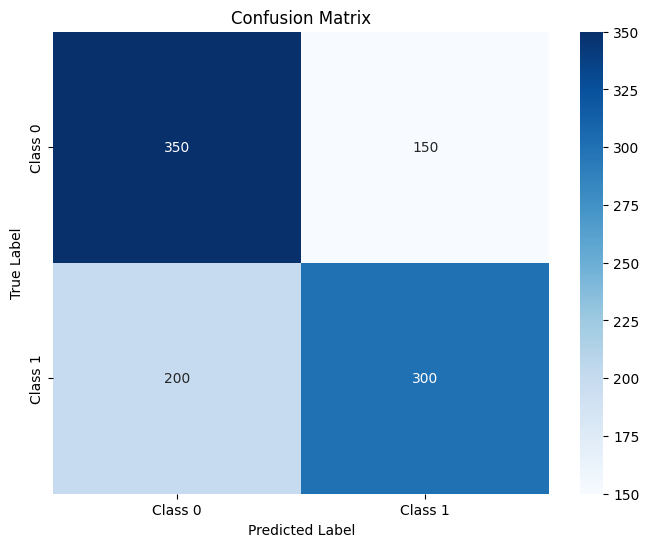

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


 ### **End of Tutorial**